In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from netCDF4 import Dataset

import cartopy.crs as ccrs
import cartopy.feature as cf

# conda install -c conda-forge cartopy

# Cartopy user guide!
### https://scitools.org.uk/cartopy/docs/latest/getting_started/index.html

# Load Data & select area of interest

In [2]:
nc = Dataset('./sst.mnmean.nc', 'r')
ds = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))

# select your target
sst = ds['sst']

# Global mean map

In [3]:
sst_selected = sst.sel(time=slice('1979-01', '2021-12')).mean('time')
sst_selected

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.799209 , -1.7992344, -1.7992644, ..., -1.7994031, -1.799278 ,
        -1.7991918],
       [-1.7992529, -1.7991649, -1.7991114, ..., -1.7997739, -1.7995081,
        -1.7993746],
       [-1.799971 , -1.7997421, -1.7995958, ..., -1.7998184, -1.7998811,
        -1.799942 ],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

c:\Users\user\.conda\envs\ocean_study\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\user\.conda\envs\ocean_study\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


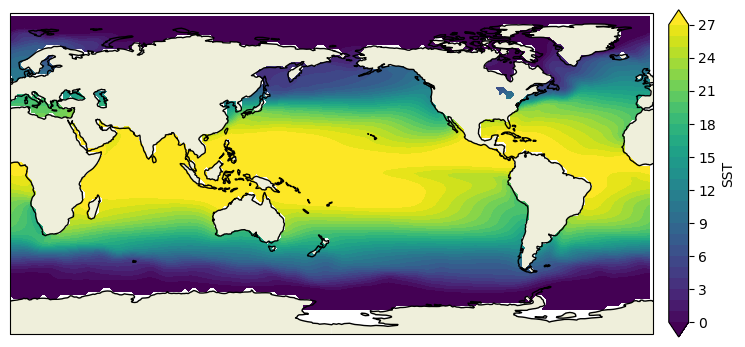

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

# check more features : https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
ax.set_global()
ax.add_feature(cf.LAND)
ax.add_feature(cf.COASTLINE, linewidth=1, color='black')

# check more options : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
cbar_kwargs = {
    'orientation':'vertical',
    'shrink':0.85, 'pad':.02, 'aspect':15,
    'extend':'both',
    'label':'SST'
}

# check more about contourf : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
sst_selected.plot.contourf(ax=ax, 
                           transform=ccrs.PlateCarree(),
                           levels=28, vmax=27, vmin=0,
                           cbar_kwargs=cbar_kwargs)
plt.show()

# Regional mean map

In [5]:
# select your area of interest and time period
sst_selected = sst.sel(time=slice('1979-01', '2021-12'), lat=slice(45.,20.), lon=slice(110.,160.)).mean('time')

c:\Users\user\.conda\envs\ocean_study\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


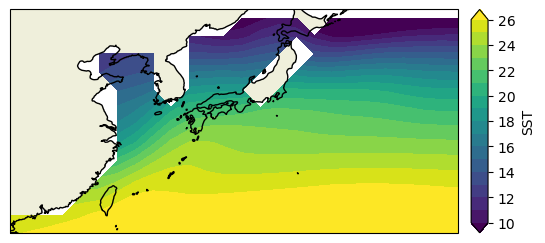

In [6]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([110, 160, 20, 45], crs=ccrs.PlateCarree())
ax.add_feature(cf.LAND)
ax.add_feature(cf.COASTLINE, linewidth=1, color='black')

cbar_kwargs = {
    'orientation':'vertical',
    'shrink':0.58, 'pad':.025, 'aspect':12,
    'extend':'both',
    'label':'SST'
}

sst_selected.plot.contourf(ax=ax, 
                           transform=ccrs.PlateCarree(),
                           levels=17, vmax=26, vmin=10,
                           cbar_kwargs=cbar_kwargs)
plt.show()